In [166]:
from ipywidgets import *
from ipywidgets.widgets import IntSlider, FloatSlider
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy.optimize import root

%matplotlib widget

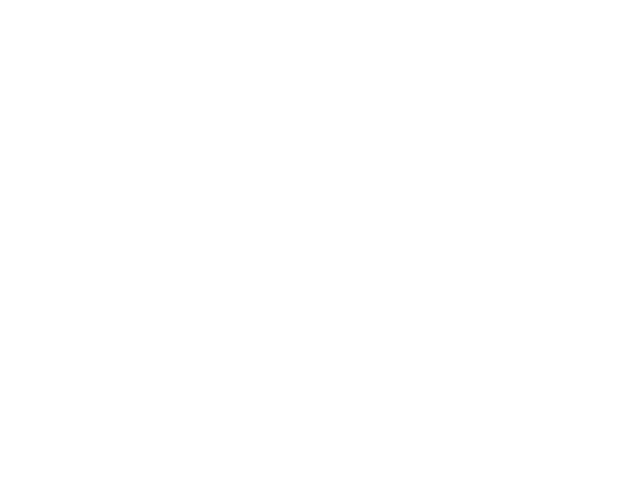

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [124]:


x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
plt.show()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()



interact(update)


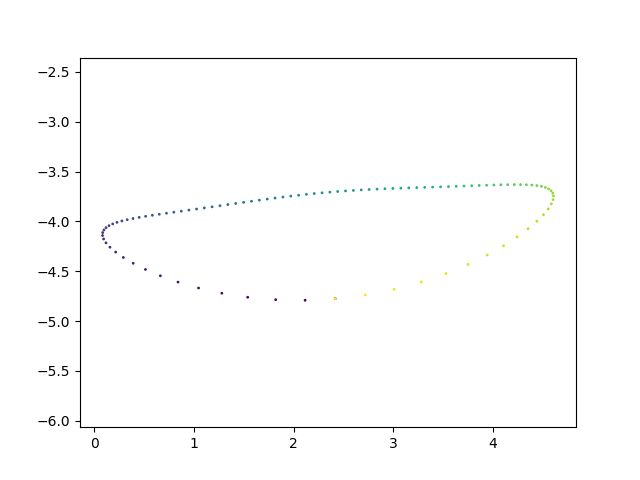

In [122]:
theta1_range = np.linspace(0, 2*pi, 100)
trace = []
guess = np.zeros(4)

L1, L2, L3, L4, L5, theta5 = (1, 2.5, 2.5, 2, 2.5, radians(10))
sin5 = sin(theta5)
cos5 = cos(theta5)

for theta1 in theta1_range:
    sin1 = sin(theta1)
    cos1 = cos(theta1)
    def func_sincos(vars):
        sin2, cos2, sin3, cos3 = vars
        return [
            L1*sin1 + L2*sin2 + L3*sin3,
            L1*cos1 + L2*cos2 + L3*cos3 - L4, 
            sin2**2 + cos2**2 - 1,
            sin3**2 + cos3**2 - 1,        
        ]
    def jac_sincos(vars):
        sin2, cos2, sin3, cos3 = vars
        return [
            [L2, 0, L3, 0],
            [0, L2, 0, L3],
            [2*sin2, 2*cos2, 0, 0],
            [0, 0, 2*sin3, 2*cos3]
        ]
    
    sol = root(func_sincos, jac=jac_sincos, x0=guess, method='hybr').x
    sin2, cos2, sin3, cos3 = sol
    guess = sol

    p5 = L1*np.array([cos1, sin1]) + L2*np.array([cos2, sin2]) + L5*np.array([cos2*cos5-sin2*sin5, sin2*cos5+cos2*sin5])
    trace.append(p5)

trace = np.array(trace)

plt.close()
plt.axis('equal')
plt.scatter(trace[:,0], trace[:,1], c=theta1_range, s=1)

interactive(children=(FloatSlider(value=1.0, description='L1', max=30.0, min=1.0, step=0.01), FloatSlider(valu…

<function __main__.update(L1=FloatSlider(value=1.0, description='L1', max=30.0, min=1.0, step=0.01), L2=FloatSlider(value=2.5, description='L2', max=30.0, min=1.0, step=0.01), L3=FloatSlider(value=2.5, description='L3', max=30.0, min=1.0, step=0.01), L4=FloatSlider(value=2.0, description='L4', max=30.0, min=1.0, step=0.01), L5=FloatSlider(value=2.5, description='L5', max=30.0, min=1.0, step=0.01), theta5=FloatSlider(value=0.0, description='theta5', max=90.0, min=-90.0, step=1.0), npts=IntSlider(value=30, description='npts', max=30, min=1))>

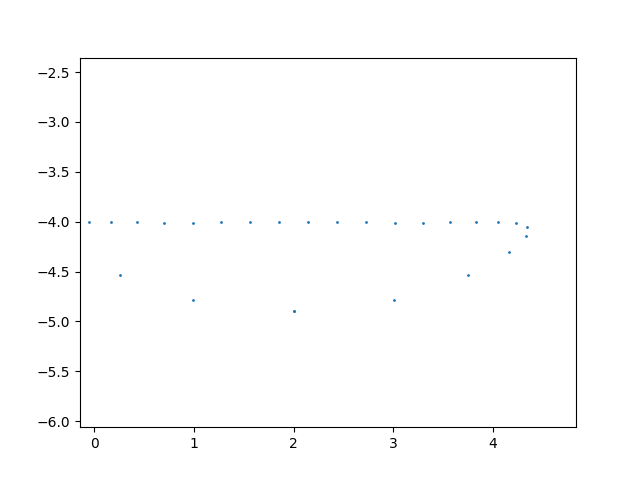

In [169]:
def get_path(dims, npts):
    theta1_range = np.linspace(0, 2*pi, npts)
    path = []
    guess = np.zeros(4)

    L1, L2, L3, L4, L5, theta5 = dims
    sin5 = sin(theta5)
    cos5 = cos(theta5)

    for theta1 in theta1_range:
        sin1 = sin(theta1)
        cos1 = cos(theta1)
        def func_sincos(vars):
            sin2, cos2, sin3, cos3 = vars
            return [
                L1*sin1 + L2*sin2 + L3*sin3,
                L1*cos1 + L2*cos2 + L3*cos3 - L4, 
                sin2**2 + cos2**2 - 1,
                sin3**2 + cos3**2 - 1,        
            ]
        def jac_sincos(vars):
            sin2, cos2, sin3, cos3 = vars
            return [
                [L2, 0, L3, 0],
                [0, L2, 0, L3],
                [2*sin2, 2*cos2, 0, 0],
                [0, 0, 2*sin3, 2*cos3]
            ]
        
        sol = root(func_sincos, jac=jac_sincos, x0=guess, method='hybr').x
        sin2, cos2, sin3, cos3 = sol
        guess = sol

        p5 = L1*np.array([cos1, sin1]) + L2*np.array([cos2, sin2]) + L5*np.array([cos2*cos5-sin2*sin5, sin2*cos5+cos2*sin5])
        path.append(p5)

    return np.array(path)


dims = (1, 2.5, 2.5, 2, 2.5, radians(10))
trace = get_path(dims, 50)

plt.close()
fig = plt.figure()
ax = fig.subplots(1, 1)
ax.axis('equal')
# path_pts = ax.scatter(trace[:,0], trace[:,1], c=theta1_range, s=1)
# path_pts, = ax.plot(trace[:,0], trace[:,1], 'o', markersize=1)
path_pts, = ax.plot(trace[:,0], trace[:,1])

def update(
        L1=FloatSlider(min=1, max=30, step=0.01, value=1),
        L2=FloatSlider(min=1, max=30, step=0.01, value=2.5),
        L3=FloatSlider(min=1, max=30, step=0.01, value=2.5),
        L4=FloatSlider(min=1, max=30, step=0.01, value=2),
        L5=FloatSlider(min=1, max=30, step=0.01, value=2.5),
        theta5=FloatSlider(min=-90, max=90, step=1, value=0),
        npts=IntSlider(min=1, max=30, step=1, value=30),
        ):
    dims = (L1, L2, L3, L4, L5, radians(theta5))
    trace = get_path(dims, npts)
    
    path_pts.set_data((trace[:,0], trace[:,1]))
    fig.canvas.draw_idle()

interact(update)